In [1]:
####### Import #######
from sklearn.datasets import fetch_openml
import sklearn
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn import neural_network
from sklearn import metrics
from sklearn.svm import SVC
import numpy as np
import time
import warnings
warnings.filterwarnings("ignore")

In [3]:
####### Loading data #######
mnist = fetch_openml('mnist_784',as_frame=False)
# images = mnist.data.reshape((-1, 28, 28))
# plt.imshow(images[0],cmap=plt.cm.gray_r,interpolation="nearest")
# plt.show()
# print("Classe : ", mnist.target[0])

In [4]:
### Create vector of 1000 random indexes
rand_indexes = np.random.randint(70000, size=5000)
### Load data with the previous vector
data = mnist.data[rand_indexes]
print("Dataset size : ", len(data))
target = mnist.target[rand_indexes]
print("Etiquettes size : ", len(target))

### Split the dataset for training and testing
# xtrain data set d'entraînement et ytrain étiquettes de xtrain
# xtest dataset de prédiction et ytest étiquettes de xtest
xtrain, xtest, ytrain, ytest = model_selection.train_test_split(data, target,train_size=0.9)
print("xtrain size : ", len(xtrain))
print("xtest size : ", len(xtest))
print("ytrain size : ", len(ytrain))
print("ytest size : ", len(ytest))

Dataset size :  5000
Etiquettes size :  5000
xtrain size :  4500
xtest size :  500
ytrain size :  4500
ytest size :  500


In [7]:
####### Premier modèle de Classifier #######

#Entraîne le classifier
clf = SVC(kernel="linear")
# print("Training...")
clf.fit(xtrain, ytrain)

#Prédiction sur le jeu de tests
# print("Predicting...")
t1 = time.time()
pred = clf.predict(xtest)
t2 = time.time()
print("Temps d'entraînement : ", round(t2-t1,5))
#print("Prédiction : ", pred)
# On calcule le score obtenu sur xtest avec les étiquettes ytest
score = clf.score(xtest, ytest)
print("Score échantillon de test : ", score)

#Infos image 4
print("Classe image 4 : ", ytest[3])
print("Classe prédite image 4 : ", pred[3])

#Calcul de différentes metrics
print("Précision pour chaque classe : \n", metrics.precision_score(ytest, pred,average=None))
print("Matrice de confusion SVM:\n", metrics.confusion_matrix(ytest, pred))
print("Zero-one classification loss :\n", metrics.zero_one_loss(ytest, pred))

Temps d'entraînement :  0.28424
Score échantillon de test :  0.906
Classe image 4 :  7
Classe prédite image 4 :  9
Précision pour chaque classe : 
 [0.96078431 0.88235294 0.89830508 0.89361702 0.94117647 0.87179487
 0.92592593 0.90243902 0.9        0.875     ]
Matrice de confusion SVM:
 [[49  0  0  0  0  0  1  0  0  0]
 [ 0 60  0  0  0  0  0  0  0  1]
 [ 1  0 53  0  0  0  0  0  0  0]
 [ 0  1  2 42  0  2  0  0  1  0]
 [ 0  0  1  0 48  0  1  0  1  1]
 [ 1  2  0  2  0 34  2  0  2  1]
 [ 0  0  0  0  0  1 50  0  0  0]
 [ 0  2  1  0  0  0  0 37  1  2]
 [ 0  2  1  3  1  2  0  1 45  0]
 [ 0  1  1  0  2  0  0  3  0 35]]
Zero-one classification loss :
 0.09399999999999997


In [47]:
####### Variations de la fonction noyau #######

list_training_times_kernel = []
list_precision_scores_kernel = []
list_zero_one_loss_kernel = []

kernel_functions = ["poly","rbf","sigmoid","precomputed"]
kernel_train = xtrain
kernel_test = xtest
for i in kernel_functions:
    print("Computing for kernel=", i, "...")
    if (i == "precomputed"):
        kernel_train=np.dot(xtrain,xtrain.T) # modified the train_set
        kernel_test=np.dot(xtest,xtrain.T) # modified the test_set
    
    #Entraîne le classifier
    clf = SVC(kernel=i)
    t1 = round(time.time(),5)
    clf.fit(kernel_train, ytrain)
    t2 = round(time.time(),5)
    #Prédiction sur le jeu de tests
    pred = clf.predict(kernel_test)
    # On sauvegarde le temps de calcul, la précision et 
    # les taux d'erreurs par classe
    list_training_times_kernel.append(t2-t1)
    list_precision_scores_kernel.append(clf.score(kernel_test, ytest))
    list_zero_one_loss_kernel.append(metrics.zero_one_loss(ytest, pred))
print("Done")

Computing for kernel= poly ...
Computing for kernel= rbf ...
Computing for kernel= sigmoid ...
Computing for kernel= precomputed ...
Done


Text(36.0, 0.5, 'Zero-one loss')

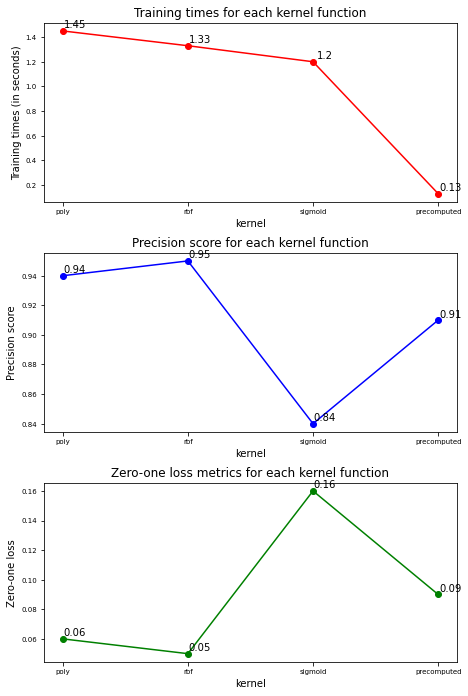

In [48]:
##### x coordinates
x = kernel_functions
training_times = list_training_times_kernel
precision_scores = list_precision_scores_kernel
zero_one_loss = list_zero_one_loss_kernel
        
training_times = [round(i,2) for i in training_times]
precision_scores = [round(i,2) for i in precision_scores]
zero_one_loss = [round(i,2) for i in zero_one_loss]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(7,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,training_times, marker='o', color='r')
figs[1].plot(x,precision_scores, marker='o', color='b')
figs[2].plot(x,zero_one_loss, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(precision_scores[i], # this is the text
                 (x[i],precision_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(zero_one_loss[i], # this is the text
                 (x[i],zero_one_loss[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Training times for each kernel function')
figs[1].title.set_text('Precision score for each kernel function')
figs[2].title.set_text('Zero-one loss metrics for each kernel function')
figs[0].set_xlabel('kernel')
figs[1].set_xlabel('kernel')
figs[2].set_xlabel('kernel')
figs[0].set_ylabel('Training times (in seconds)')
figs[1].set_ylabel('Precision score')
figs[2].set_ylabel('Zero-one loss')

In [49]:
####### Variation du paramètre de tolérance aux erreurs C #######

list_training_times_tol = []
list_precision_scores_tol = []
list_zero_one_loss_tol = []

kernel_train = xtrain
kernel_test = xtest
tols = [0.1,0.25,0.5,0.75,1.0]

for i in tols:
    print("Computing for C=", i, "...")
    #Entraîne le classifier
    clf = SVC(C=i, kernel="rbf")
    t1 = round(time.time(),5)
    clf.fit(kernel_train, ytrain)
    t2 = round(time.time(),5)
    #Prédiction sur le jeu de tests
    pred = clf.predict(kernel_test)
    # On sauvegarde le temps de calcul, la précision et 
    # les taux d'erreurs par classe
    list_training_times_tol.append(t2-t1)
    list_precision_scores_tol.append(clf.score(kernel_test, ytest))
    list_zero_one_loss_tol.append(metrics.zero_one_loss(ytest, pred))
print("Done")

Computing for C= 0.1 ...
Computing for C= 0.25 ...
Computing for C= 0.5 ...
Computing for C= 0.75 ...
Computing for C= 1.0 ...
Done


Text(36.0, 0.5, 'Zero-one loss')

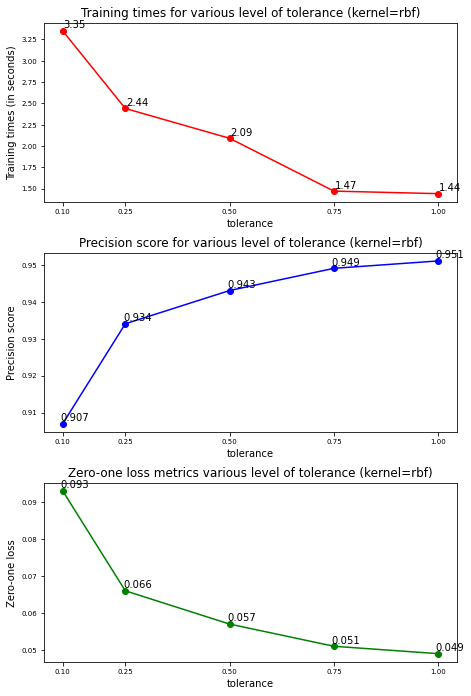

In [50]:
##### x coordinates
x = tols
training_times = list_training_times_tol
precision_scores = list_precision_scores_tol
zero_one_loss = list_zero_one_loss_tol
        
training_times = [round(i,2) for i in training_times]
precision_scores = [round(i,3) for i in precision_scores]
zero_one_loss = [round(i,3) for i in zero_one_loss]

### Create plot
fig, figs = plt.subplots(nrows=3, ncols=1, figsize=(7,10))
fig.tight_layout(pad=3.0)
figs[0].plot(x,training_times, marker='o', color='r')
figs[1].plot(x,precision_scores, marker='o', color='b')
figs[2].plot(x,zero_one_loss, marker='o', color='g')

### Add every x coordinates
figs[0].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[1].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)
figs[2].tick_params(axis='both', which='both', labelsize=7, labelbottom=True)

for i in range(len(x)):
    figs[0].annotate(training_times[i], # this is the text
                 (x[i],training_times[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[1].annotate(precision_scores[i], # this is the text
                 (x[i],precision_scores[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
    figs[2].annotate(zero_one_loss[i], # this is the text
                 (x[i],zero_one_loss[i]), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(12,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center

figs[0].set_xticks(x)
figs[1].set_xticks(x)
figs[2].set_xticks(x)
    
### Add title and axis names
figs[0].title.set_text('Training times for various level of tolerance (kernel=rbf)')
figs[1].title.set_text('Precision score for various level of tolerance (kernel=rbf)')
figs[2].title.set_text('Zero-one loss metrics various level of tolerance (kernel=rbf)')
figs[0].set_xlabel('tolerance')
figs[1].set_xlabel('tolerance')
figs[2].set_xlabel('tolerance')
figs[0].set_ylabel('Training times (in seconds)')
figs[1].set_ylabel('Precision score')
figs[2].set_ylabel('Zero-one loss')

In [51]:
####### Meilleur modèle de SVM #######

#Entraîne le classifier
clf = SVC(C=1.0,kernel="rbf")
print("Training...")
clf.fit(xtrain, ytrain)

#Prédiction sur le jeu de tests
print("Predicting...")
pred = clf.predict(xtest)
# On calcule le score obtenu sur xtest avec les étiquettes ytest
score = clf.score(xtest, ytest)
print("Score échantillon de test : ", score)

#Calcul de différentes metrics
print("Précision pour chaque classe : \n", metrics.precision_score(ytest, pred,average=None))
print("Matrice de confusion pour C=1.0 et kernel=rbf :\n", metrics.confusion_matrix(ytest, pred))
print("Zero-one classification loss :\n", metrics.zero_one_loss(ytest, pred))

Training...
Predicting...
Score échantillon de test :  0.9506666666666667
Précision pour chaque classe : 
 [0.99324324 0.97633136 0.93377483 0.95375723 0.92546584 0.91549296
 0.96527778 0.95833333 0.96402878 0.91472868]
Matrice de confusion pour C=1.0 et kernel=rbf :
 [[147   0   0   0   1   0   0   0   1   0]
 [  0 165   0   0   0   0   0   0   1   0]
 [  1   2 141   0   0   1   1   1   0   0]
 [  0   0   3 165   0   3   0   1   1   1]
 [  0   0   1   0 149   0   1   0   0   5]
 [  0   0   0   4   2 130   3   1   1   1]
 [  0   0   1   0   0   3 139   0   0   0]
 [  0   1   3   0   4   0   0 138   0   4]
 [  0   1   1   3   1   4   0   0 134   0]
 [  0   0   1   1   4   1   0   3   1 118]]
Zero-one classification loss :
 0.04933333333333334
